In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

 99% 156M/158M [00:06<00:00, 26.1MB/s]
100% 158M/158M [00:06<00:00, 24.1MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-image-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/Covid19-dataset/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(64,64)
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    label=tf.one_hot(label, depth=3)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 batch_normalization_9 (Batc  (None, 62, 62, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 32)        9248      
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 32)       128       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
8/8 [==============================] - 8s 127ms/step - loss: 0.4569 - accuracy: 0.7251 - val_loss: 0.6743 - val_accuracy: 0.4091
Epoch 2/10
8/8 [==============================] - 3s 100ms/step - loss: 0.1793 - accuracy: 0.9203 - val_loss: 0.6423 - val_accuracy: 0.5606
Epoch 3/10
8/8 [==============================] - 3s 102ms/step - loss: 0.1176 - accuracy: 0.9243 - val_loss: 0.5919 - val_accuracy: 0.5455
Epoch 4/10
8/8 [==============================] - 3s 100ms/step - loss: 0.0697 - accuracy: 0.9801 - val_loss: 0.6029 - val_accuracy: 0.3939
Epoch 5/10
8/8 [==============================] - 3s 59ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 0.6594 - val_accuracy: 0.3939
Epoch 6/10
8/8 [==============================] - 3s 100ms/step - loss: 0.0313 - accuracy: 0.9880 - val_loss: 0.7856 - val_accuracy: 0.3939
Epoch 7/10
8/8 [==============================] - 3s 58ms/step - loss: 0.0217 - accuracy: 0.9960 - val_loss: 0.9884 - val_accuracy: 0.3939
Epoch 8/10
8/8 [======

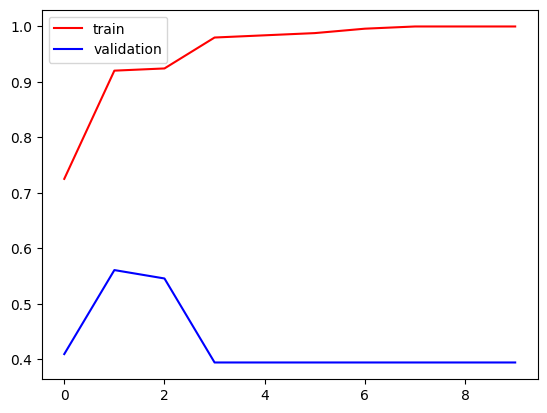

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

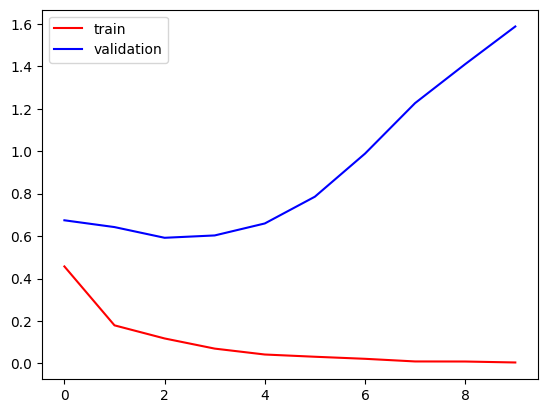

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

ways to reduce overfitting - 
Add more data
Dropout
Reduce complexity


In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog_05.jpg')

TypeError: ignored

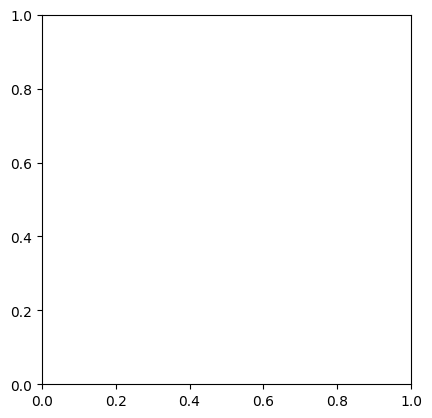

In [ ]:
plt.imshow(test_img)